Research Question: 
How does healthcare access and quality impact life expectancy across countries, and has this relationship changed over time?


Hypothesis:
There is a significant positive correlation between healthcare access quality and life expectancy

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set Seaborn theme for visualizations
sns.set_theme(style="darkgrid")


In [2]:
# Loading the dataset
file_path = r'universal-health-coverage-index.csv'

# Reading the CSV file
try:
    healthcare_data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")


Dataset loaded successfully!


DATA CLEANING AND MERGING

In [3]:
def clean_and_prepare_data(df):
    # Renaming columns for consistency
    df = df.rename(columns={
        'Entity': 'Country',
        'UHC Service Coverage Index (SDG 3.8.1)': 'Healthcare_Index'
    })

    # Dropping rows with missing values
    df_cleaned = df.dropna()

    # Adding a column for decades
    df_cleaned['Decade'] = (df_cleaned['Year'] // 10) * 10

    # Simplified region mapping
    regions = {
        'United States': 'North America', 'Canada': 'North America',
        'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia',
        'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
        'Brazil': 'South America', 'Argentina': 'South America',
        'Nigeria': 'Africa', 'South Africa': 'Africa',
        'Australia': 'Oceania', 'New Zealand': 'Oceania'
    }
    df_cleaned['Region'] = df_cleaned['Country'].map(regions).fillna('Other')

    return df_cleaned

# Cleaning the data
clean_data = clean_and_prepare_data(healthcare_data)
print("Data cleaned and prepared successfully!")

# Merging datasets
def prepare_data(healthcare, life_expectancy):
    # Rename columns for clarity
    healthcare = healthcare.rename(columns={
        'Entity': 'Country',
        'UHC Service Coverage Index (SDG 3.8.1)': 'Healthcare_Index'
    }).dropna()
    
    life_expectancy = life_expectancy.rename(columns={
        'Entity': 'Country',
        'Life expectancy': 'Life_Expectancy'
    }).dropna()
    
    # Merge the datasets on Country and Year
    merged = pd.merge(healthcare, life_expectancy, on=['Country', 'Year'], how='inner')
    
    # Add derived features
    merged['Decade'] = (merged['Year'] // 10) * 10
    regions = {
        'United States': 'North America', 'Canada': 'North America',
        'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia',
        'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
        'Brazil': 'South America', 'Argentina': 'South America',
        'Nigeria': 'Africa', 'South Africa': 'Africa',
        'Australia': 'Oceania', 'New Zealand': 'Oceania'
    }
    merged['Region'] = merged['Country'].map(regions).fillna('Other')
    return merged

try:
    merged_data = prepare_data(healthcare_data, life_expectancy_data)
    print("Merged data created successfully!")
except Exception as e:
    print(f"Error during merging: {e}")


Data cleaned and prepared successfully!
Error during merging: name 'life_expectancy_data' is not defined


C:\Users\user\AppData\Local\Temp\ipykernel_10224\3257812736.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Decade'] = (df_cleaned['Year'] // 10) * 10
C:\Users\user\AppData\Local\Temp\ipykernel_10224\3257812736.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Region'] = df_cleaned['Country'].map(regions).fillna('Other')


DESCRIPTIVE STATISTICS AND ANALYSIS

In [4]:
def perform_descriptive_analysis(df):
    print("Descriptive Statistics:")
    print(df['Healthcare_Index'].describe())

    # Healthcare Index by Decade
    print("\nHealthcare Index by Decade:")
    print(df.groupby('Decade')['Healthcare_Index'].describe())

    # Regional Statistics
    print("\nRegional Analysis:")
    print(df.groupby('Region')['Healthcare_Index'].describe())

perform_descriptive_analysis(clean_data)


Descriptive Statistics:
count    1365.000000
mean       59.328875
std        18.904899
min        10.699520
25%        44.601430
50%        62.637170
75%        75.315740
max        91.037920
Name: Healthcare_Index, dtype: float64

Healthcare Index by Decade:
        count       mean        std       min        25%        50%  \
Decade                                                                
2000    390.0  48.659420  19.222168  10.69952  31.391503  49.967010   
2010    780.0  63.181820  17.163839  17.37231  48.147002  67.831375   
2020    195.0  65.256004  16.283109  26.79095  51.726320  68.543450   

              75%       max  
Decade                       
2000    64.600652  83.27841  
2010    77.154157  90.53122  
2020    78.546500  91.03792  

Regional Analysis:
                count       mean        std       min        25%        50%  \
Region                                                                        
Africa           14.0  48.442823  17.863346  19.98557  3

VISUALISATION

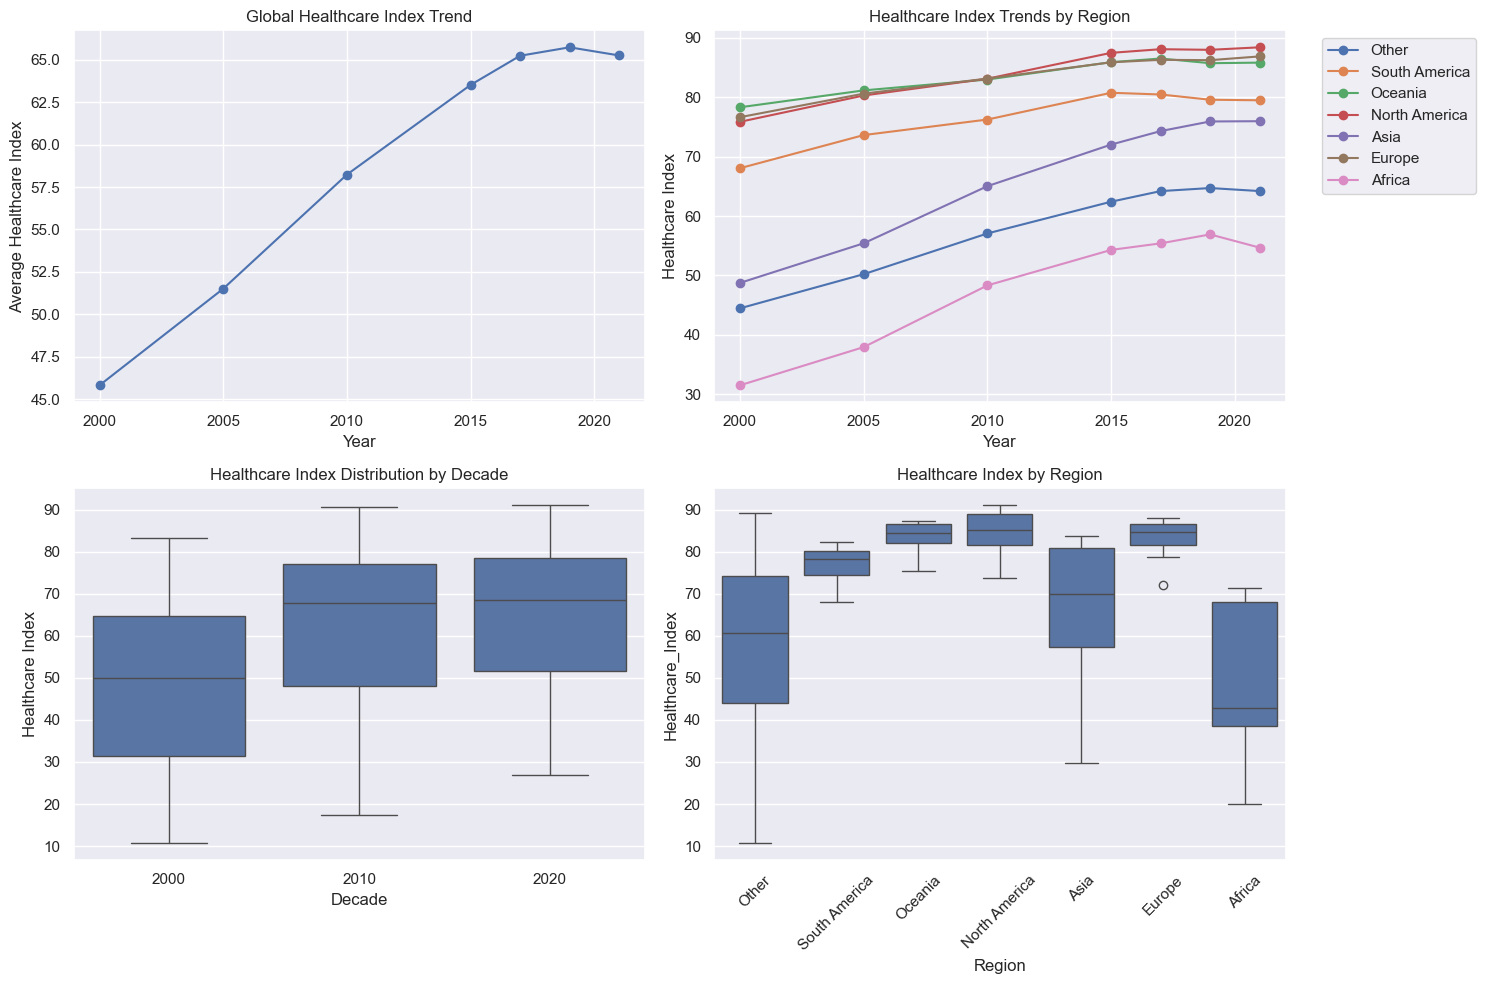

In [5]:
def analyze_trends(df):
    plt.figure(figsize=(15, 10))

    # Overall trend
    plt.subplot(2, 2, 1)
    yearly_mean = df.groupby('Year')['Healthcare_Index'].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o')
    plt.title('Global Healthcare Index Trend')
    plt.xlabel('Year')
    plt.ylabel('Average Healthcare Index')

    # Regional trends
    plt.subplot(2, 2, 2)
    for region in df['Region'].unique():
        region_data = df[df['Region'] == region]
        region_mean = region_data.groupby('Year')['Healthcare_Index'].mean()
        plt.plot(region_mean.index, region_mean.values, label=region, marker='o')
    plt.title('Healthcare Index Trends by Region')
    plt.xlabel('Year')
    plt.ylabel('Healthcare Index')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    # Healthcare Index Distribution by Decade
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Decade', y='Healthcare_Index')
    plt.title('Healthcare Index Distribution by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Healthcare Index')

    # Regional comparison
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='Region', y='Healthcare_Index')
    plt.title('Healthcare Index by Region')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

analyze_trends(clean_data)


STATISTICAL ANALYSIS

In [6]:
def perform_statistical_analysis(df):
    # Compare earliest and latest years
    early_data = df[df['Year'] == df['Year'].min()]['Healthcare_Index']
    recent_data = df[df['Year'] == df['Year'].max()]['Healthcare_Index']

    t_stat, p_value = ttest_ind(early_data, recent_data)
    print(f"T-test Results: t-stat={t_stat:.4f}, p-value={p_value:.4f}")

    # Regional differences (ANOVA)
    f_stat, p_val = f_oneway(*[group['Healthcare_Index'] for _, group in df.groupby('Region')])
    print(f"ANOVA Results: F-stat={f_stat:.4f}, p-value={p_val:.4f}")

perform_statistical_analysis(clean_data)


T-test Results: t-stat=-10.9440, p-value=0.0000
ANOVA Results: F-stat=19.3557, p-value=0.0000


REGRESSION ANALYSIS

In [7]:
def perform_regression_analysis(df):
    X = df[['Year']]
    y = df['Healthcare_Index']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model
    r_squared = model.score(X_test, y_test)
    print(f"Regression R-squared: {r_squared:.4f}")
    print(f"Coefficient: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")

perform_regression_analysis(clean_data)


Regression R-squared: 0.0936
Coefficient: 1.0336, Intercept: -2020.9405


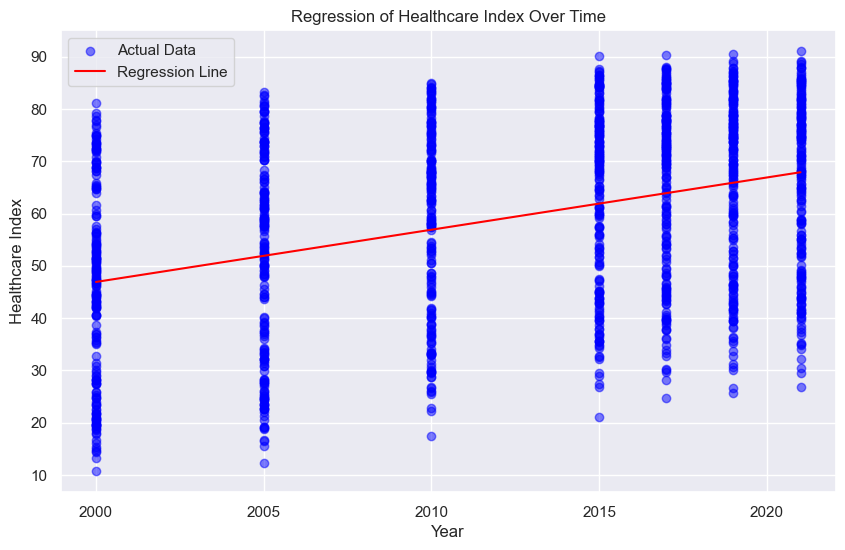

In [8]:
def plot_regression_line(df):
    X = df[['Year']]
    y = df['Healthcare_Index']

    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
    plt.plot(X, predictions, color='red', label='Regression Line')
    plt.title('Regression of Healthcare Index Over Time')
    plt.xlabel('Year')
    plt.ylabel('Healthcare Index')
    plt.legend()
    plt.show()

plot_regression_line(clean_data)


KEY FINDINGS

In [9]:
def generate_summary(df):
    latest_year = df['Year'].max()
    recent_data = df[df['Year'] == latest_year]

    print("\nKey Findings:")
    print(f"Global Average Healthcare Index in {latest_year}: {recent_data['Healthcare_Index'].mean():.2f}")
    print(f"Top 5 Countries:\n{recent_data.nlargest(5, 'Healthcare_Index')[['Country', 'Healthcare_Index']]}")
    print(f"Regional Averages:\n{recent_data.groupby('Region')['Healthcare_Index'].mean()}")

generate_summary(clean_data)



Key Findings:
Global Average Healthcare Index in 2021: 65.26
Top 5 Countries:
          Country  Healthcare_Index
251        Canada          91.03792
1203  South Korea          89.08912
601       Iceland          88.91830
1161    Singapore          88.51465
524       Germany          87.96261
Regional Averages:
Region
Africa           54.687255
Asia             75.952697
Europe           86.851307
North America    88.383370
Oceania          85.805845
Other            64.197866
South America    79.471125
Name: Healthcare_Index, dtype: float64


MACHINE LEARNING HYPOTHESIS TESTING

In [10]:
# Define file paths
file_healthcare = 'universal-health-coverage-index.csv'  # Update path if needed
file_life_expectancy = 'life-expectancy.csv'  # Update path if needed

# Load datasets
try:
    healthcare_data = pd.read_csv(file_healthcare)
    life_expectancy_data = pd.read_csv(file_life_expectancy)
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"File not found: {e}")


Datasets loaded successfully!


In [11]:
print("Healthcare Data Sample:")
print(healthcare_data.head())

print("\nLife Expectancy Data Sample:")
print(life_expectancy_data.head())


Healthcare Data Sample:
        Entity Code  Year  UHC Service Coverage Index (SDG 3.8.1)
0  Afghanistan  AFG  2000                                22.60528
1  Afghanistan  AFG  2005                                27.51268
2  Afghanistan  AFG  2010                                29.43584
3  Afghanistan  AFG  2015                                35.57227
4  Afghanistan  AFG  2017                                40.55108

Life Expectancy Data Sample:
        Entity Code  Year  Period life expectancy at birth - Sex: all - Age: 0
0  Afghanistan  AFG  1950                                            27.7275  
1  Afghanistan  AFG  1951                                            27.9634  
2  Afghanistan  AFG  1952                                            28.4456  
3  Afghanistan  AFG  1953                                            28.9304  
4  Afghanistan  AFG  1954                                            29.2258  


In [ ]:
# Cleaning and merging datasets for machine learning
def prepare_data(healthcare, life_expectancy):
    # Rename columns for clarity
    healthcare = healthcare.rename(columns={
        'Entity': 'Country',
        'UHC Service Coverage Index (SDG 3.8.1)': 'Healthcare_Index'
    }).dropna()

    # Rename life expectancy column to a consistent name
    life_expectancy = life_expectancy.rename(columns={
        'Entity': 'Country',
        'Period life expectancy at birth - Sex: all - Age: 0': 'Life_Expectancy'
    }).dropna()

    # Merge datasets
    merged = pd.merge(healthcare, life_expectancy, on=['Country', 'Year'], how='inner')

    # Add derived columns
    merged['Decade'] = (merged['Year'] // 10) * 10
    regions = {
        'United States': 'North America', 'Canada': 'North America',
        'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia',
        'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
        'Brazil': 'South America', 'Argentina': 'South America',
        'Nigeria': 'Africa', 'South Africa': 'Africa',
        'Australia': 'Oceania', 'New Zealand': 'Oceania'
    }
    merged['Region'] = merged['Country'].map(regions).fillna('Other')

    return merged


In [ ]:
# Loading and preparing datasets
try:
    healthcare_data = pd.read_csv(file_healthcare)
    life_expectancy_data = pd.read_csv(file_life_expectancy)

    merged_data = prepare_data(healthcare_data, life_expectancy_data)
    print("Merged data created successfully!")
    print(merged_data.head())
except Exception as e:
    print(f"Error during data preparation: {e}")


Merged data created successfully!
       Country Code_x  Year  Healthcare_Index Code_y  Life_Expectancy  Decade  \
0  Afghanistan    AFG  2000          22.60528    AFG          55.2978    2000   
1  Afghanistan    AFG  2005          27.51268    AFG          58.3608    2000   
2  Afghanistan    AFG  2010          29.43584    AFG          60.8508    2010   
3  Afghanistan    AFG  2015          35.57227    AFG          62.6587    2010   
4  Afghanistan    AFG  2017          40.55108    AFG          63.0160    2010   

  Region  
0  Other  
1  Other  
2  Other  
3  Other  
4  Other  


Linear Regression - MSE: 15.0683, R²: 0.8069
Random Forest - MSE: 20.6182, R²: 0.7357


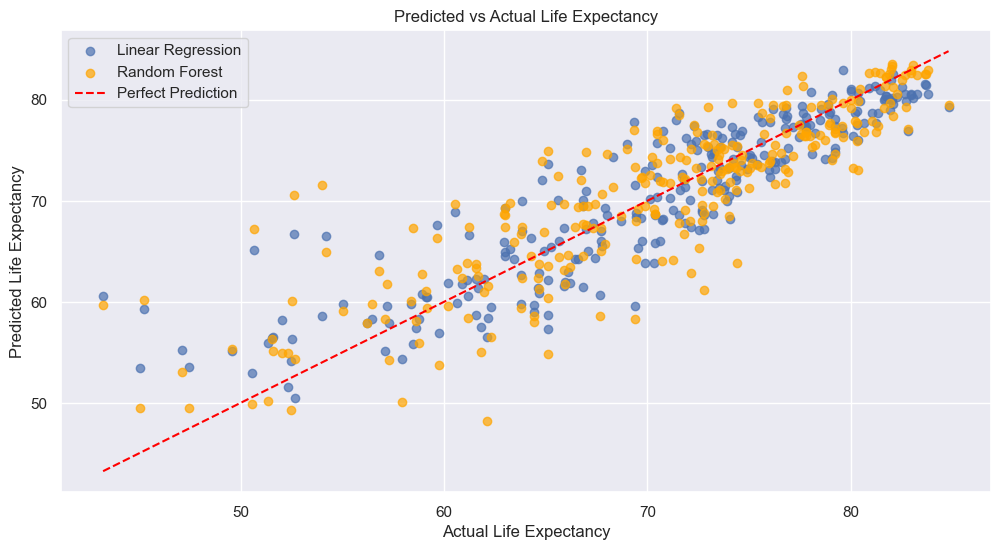

In [14]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Machine Learning Workflow
def machine_learning_workflow(df):
    # Prepare Features (X) and Target (y)
    encoder = OneHotEncoder()
    if 'Region' in df.columns:
        encoded_region = encoder.fit_transform(df[['Region']]).toarray()
        region_columns = [f"Region_{cat}" for cat in encoder.categories_[0]]
        encoded_region_df = pd.DataFrame(encoded_region, columns=region_columns, index=df.index)
        df = pd.concat([df, encoded_region_df], axis=1)

    # Define features and target variable
    features = ['Year', 'Healthcare_Index'] + (region_columns if 'Region' in df.columns else [])
    X = df[features]
    y = df['Life_Expectancy']

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Models
    results = {}

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    results['Linear Regression'] = {
        'mse': mean_squared_error(y_test, lr_predictions),
        'r2': r2_score(y_test, lr_predictions),
        'model': lr_model
    }

    # Random Forest
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    results['Random Forest'] = {
        'mse': mean_squared_error(y_test, rf_predictions),
        'r2': r2_score(y_test, rf_predictions),
        'model': rf_model
    }

    # Print Results
    for model_name, metrics in results.items():
        print(f"{model_name} - MSE: {metrics['mse']:.4f}, R²: {metrics['r2']:.4f}")

    # Plot Predictions vs Actual
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)
    plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7, color='orange')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.title('Predicted vs Actual Life Expectancy')
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.legend()
    plt.show()

    return results

# Execute the Workflow
try:
    ml_results = machine_learning_workflow(merged_data)
except Exception as e:
    print(f"Error during machine learning workflow: {e}")
